# <span style="color:Orange"> CASE STUDY : 2</span>
## loan defauter analysis
 importing the required libraries

In [832]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

##  <span style="color:Orange"> Creating dataframes for the given data files</span>


In [833]:
test=pd.read_csv('loan.csv')
main=pd.read_csv('loan.csv')

C:\Users\harsh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## <span style ="color :blue">**Check point 2**. Data Cleaning
- Need to fix rows and columns
- Need to standardise values
- Need to fix invalid values
- Need to  filter data



## <span style="color:orange" > 1. Checklist for Fixing Rows &Columns

In [834]:
k=test.isnull().sum()/len(df)*100<30
test=test.iloc[:,k.values]
k=test.isnull().sum()/len(df)
test=test.dropna()
k=test.isnull().sum()/len(df)

del(test['id'])
del(test['member_id'])

test['PnL']=(
    test['total_pymnt']-test['funded_amnt']
)*100/test['funded_amnt']


## <span style="color:orange" > 2. Checklist for Standardise values
here we convert all the values to standard values for example inr rate are in precentage  so we convert such columns into numeric values.


In [835]:
    
test['revol_util']=test['revol_util'].apply(lambda x:x.rstrip('%'))
test['revol_util'] =pd.to_numeric(test['revol_util'])
test["loan_status"].value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

In [836]:

for i in test:
    if test[i].dtype.str=="|O" and i!="loan_status":#find all the object datatype in the series
        k=test[i].value_counts()#chech number of categories
        k=k.index.values.tolist()
        sorted(k,reverse=False)
        v=[x for x in range(0,len(k))]
        dic={k:v for (k,v) in zip(k,v)}
        test[i]=test[i].map(dic)


## <span style="color:orange" >3. Checklist for Fixing invalid values</span>
**in here we try to remove row which are not needed for further analysis**

In [837]:
test = test[test['loan_status'] != 'Current']
test["loan_status"]=test["loan_status"].apply(lambda x: 0 if x=='Fully Paid' else 1)
test.loan_status.value_counts()

0    30423
1     4942
Name: loan_status, dtype: int64

##  <span style="color:orange"> 4.Checklist to  filter data </span>

this fuction give the correlation of the data set

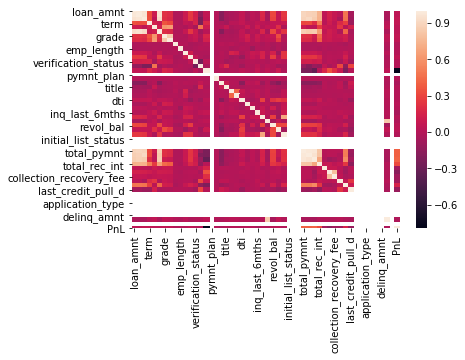

In [838]:
def k(test):
    p=test.corr()
    sns.heatmap(p)
    return p
p=k(test)

#### From this heat map we can see that some columns are not having any correlation.<br>   so let's remove those columns </br>

In [839]:
test=test.loc[:,~p.loan_status.isnull()]

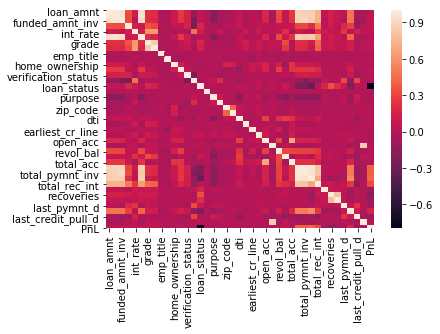

In [840]:
p=k(test)


In [841]:
p.shape

(41, 41)

## <span style="color:light blue">  Checkpoin 3: Data Analysis
<p>Let's now move to data analysis. To start with, lets understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the other two types of variables.</p>

In [842]:

behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
    "title",
  "last_pymnt_amnt",
  "last_credit_pull_d",]


In [843]:
p = p.drop(behaviour_var, axis=1)

In [844]:
p = p.drop(behaviour_var)

In [845]:
k=["url","zip_code","addr_state"]
p=p.drop(k,axis=1)
p=p.drop(k)

#### now p contain all the colmns index values of the test which are need for  futher analysis

In [846]:
p.shape

(20, 20)

Next, let's start with univariate analysis and then move to bivariate analysis.

# <span style="color:orange"> Univariate Analysis</span>

First, let's look at the overall default rate.


In [847]:
main['PnL']=(
    main['total_pymnt']-main['funded_amnt']
)*100/main['funded_amnt']
main=main[p.columns]
main=main.dropna()

Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [848]:
main = main[main['loan_status'] != 'Current']
main["loan_status"]=main["loan_status"].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [849]:
main['emp_length'] = main['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
main['emp_length'] = main['emp_length'].apply(lambda x: pd.to_numeric(x))
main['int_rate'] = main['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
main=main.drop("emp_title",axis=1)

In [850]:
round(main["loan_status"].mean(),2)*100

14.000000000000002

The overall default rate is about 14%.  

Let's first visualise the average default rates across categorical variables.

In [851]:
from datetime import datetime
main['issue_d'] = main['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


# extracting month and year from issue_date
main['month'] = main['issue_d'].apply(lambda x: x.month)
main['year'] = main['issue_d'].apply(lambda x: x.year)
main=main.drop("issue_d",axis=1)

numeric_data = main.select_dtypes(include = [np.number])



categorical_data = main.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and  string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 14 numerical , 6 categorical and  string features in the training data


In [852]:
def plot_var(var):
    siz=len(main[var].unique())
    plt.figure(figsize=(siz+3, 5))
    sns.barplot(x=var, y='loan_status', data=main)
    ##sns.countplot(x=var, hue='loan_status', data=main)
    plt.show()


Let's first visualise the average default rates across categorical variables.


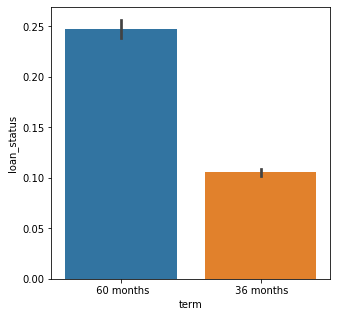

In [853]:
plot_var(categorical_data.columns[0])

#### majority of defaulters have 60 months  time period


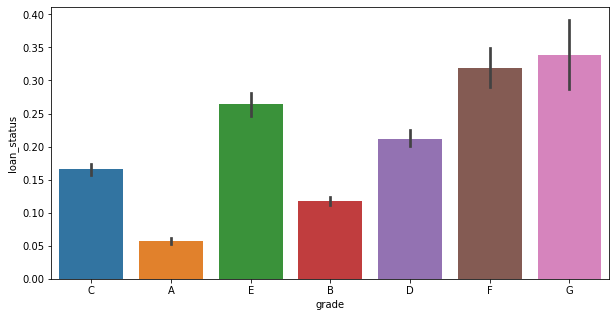

In [854]:
plot_var(categorical_data.columns[1])

#### Clearly, as the grade of loan goes from A to G, the default rate increases. 

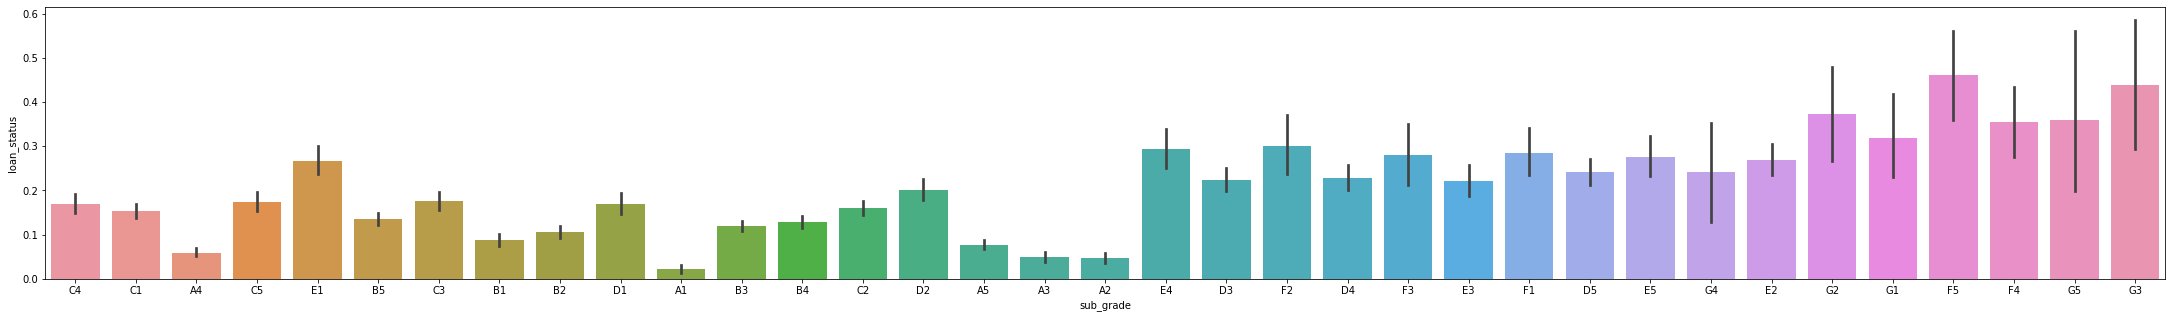

In [855]:
plot_var(categorical_data.columns[2])

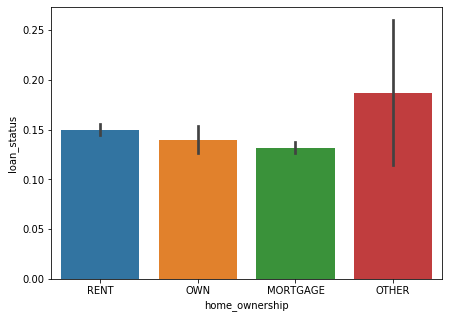

In [856]:
plot_var(categorical_data.columns[3])


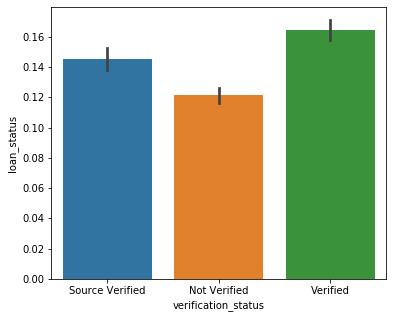

In [857]:
plot_var(categorical_data.columns[4])

#### majority of the defaulters are verified

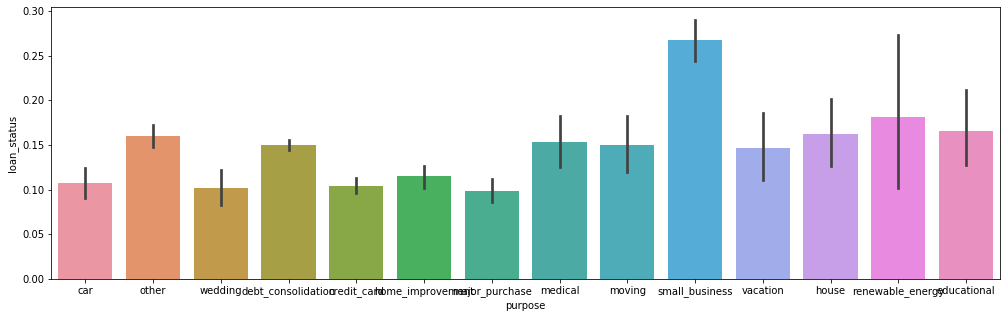

In [858]:
plot_var(categorical_data.columns[5])


#### majority of defaulter are  small_business

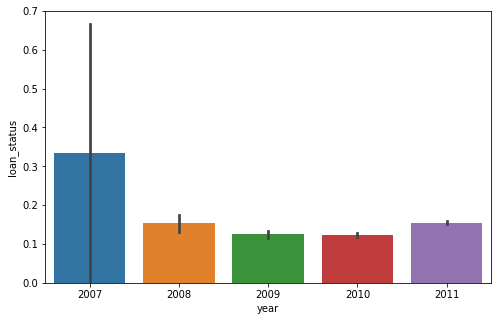

In [859]:
plot_var("year")

### the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

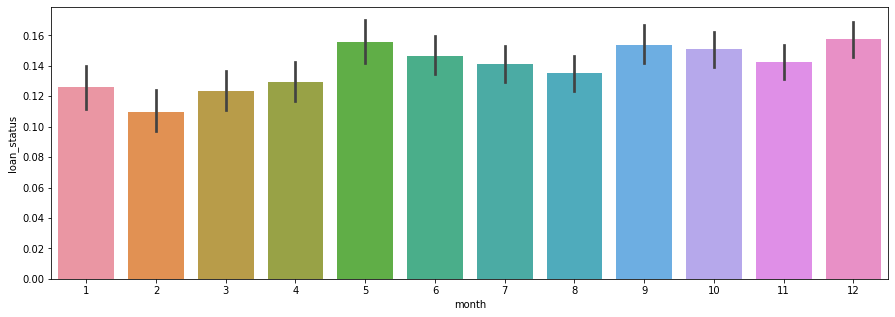

In [860]:
plot_var("month")

#### most of the loans are taken in the second half of the year and mostly in december

## Let's now analyse how the default rate varies across continuous variables.

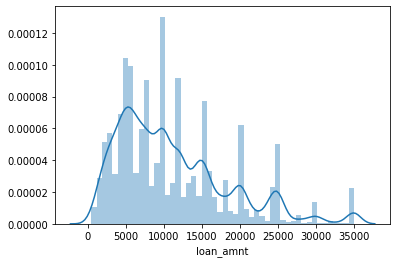

In [861]:
# loan amount: the median loan amount is around 10,000
sns.distplot(test['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.
Let's bin the loan amount variable into small, medium, high, very high.

In [862]:
# binning loan amount
def catm(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        

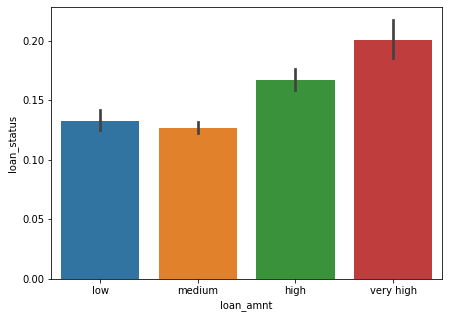

In [863]:
main['loan_amnt'] = main['loan_amnt'].apply(lambda x: catm(x))
plot_var('loan_amnt')

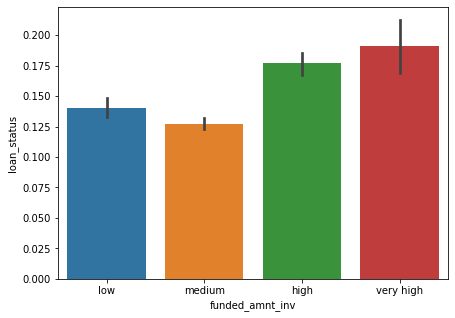

In [864]:
main['funded_amnt_inv'] = main['funded_amnt_inv'].apply(lambda x: catm(x))
plot_var('funded_amnt_inv')

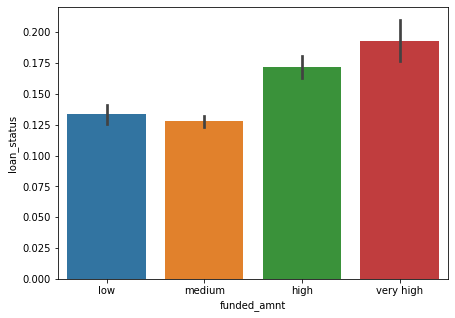

In [865]:
main['funded_amnt'] = main['funded_amnt'].apply(lambda x: catm(x))
plot_var('funded_amnt')

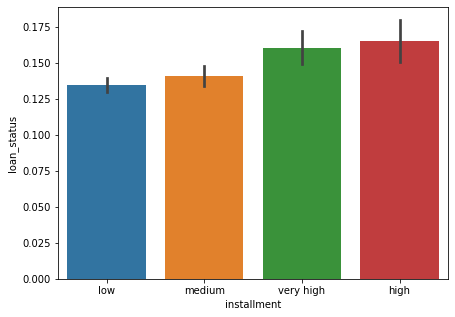

In [866]:
main['installment']=main["installment"].apply(lambda x:'low' if x<=300 else("medium" if x>300 and x<=500 else ("high" if x > 400 and x <=600 else "very high" )))
plot_var('installment')

### majority of the defaulters has high installment  rate i.e greater than 400 less than 600

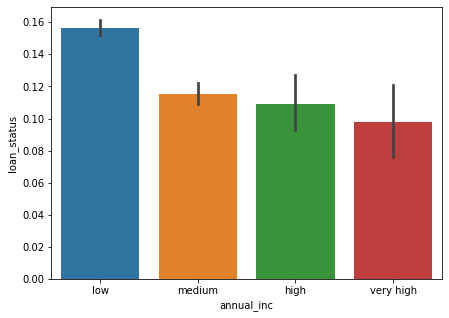

In [867]:
main['annual_inc']=main["annual_inc"].apply(lambda x:'low' if x<=70000 else("medium" if x>70000 and x<140000 else ("high" if x > 140000 and x <=200000 else "very high" )))
plot_var('annual_inc')

### majority of defaultors are low income people i.e whoes annual income is less than 70000

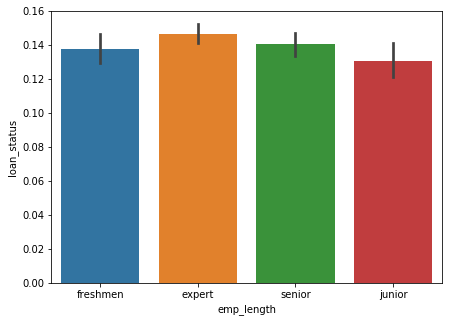

In [868]:
main['emp_length']=main['emp_length'].apply(lambda x: 'freshmen' if x<=1 else("junior" if x>1 and x<3 else ("senior" if x > 3 and x <=7 else "expert" )))
plot_var('emp_length')


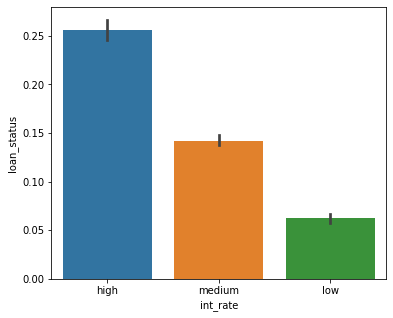

In [869]:
main['int_rate']=main['int_rate'].apply(lambda x: 'low' if x<=10 else("medium" if x>10 and x<15 else "high"))
plot_var('int_rate')

### majority of defaulters have high interest rates i.e more than 15

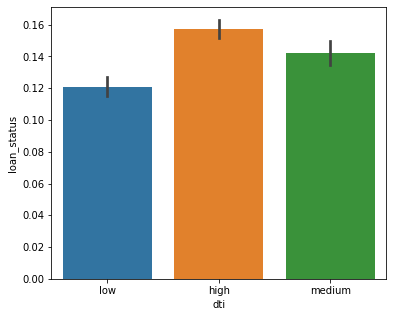

In [870]:
main['dti']=main['dti'].apply(lambda x: 'low' if x<=10 else("medium" if x>10 and x<15 else "high"))
plot_var('dti')

### majority of defaulters have high dti rates i.e more than 15

# <span style="color :orange"> Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.


In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

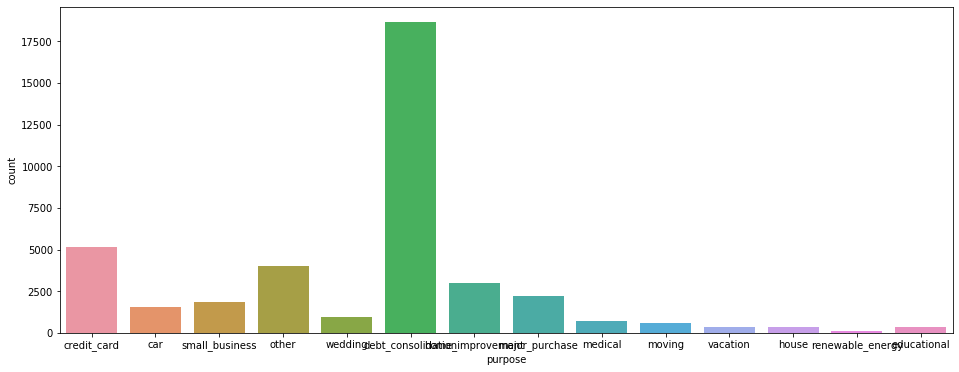

In [871]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.show()

### Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [872]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
main = main[main['purpose'].isin(main_purposes)]
main['purpose'].value_counts()

debt_consolidation    16952
credit_card            4630
home_improvement       2620
major_purchase         1983
Name: purpose, dtype: int64

In [873]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=main)
    plt.show()

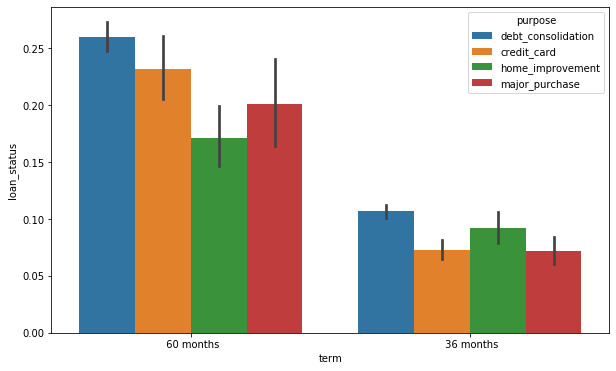

In [874]:
plot_segmented("term")

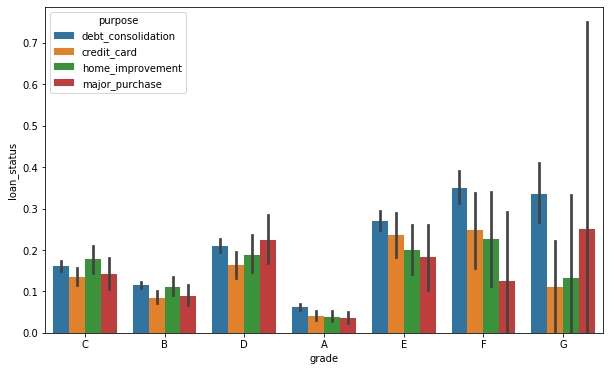

In [875]:
plot_segmented('grade')

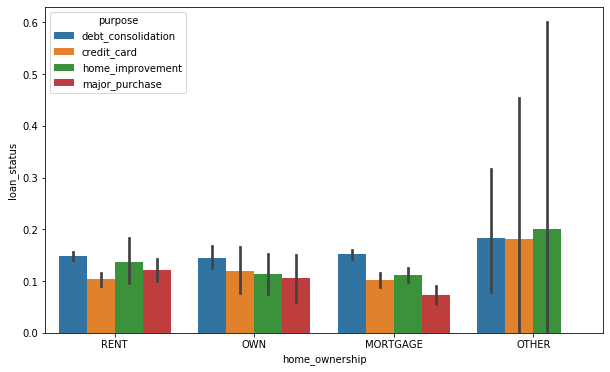

In [876]:
plot_segmented('home_ownership')

In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well.

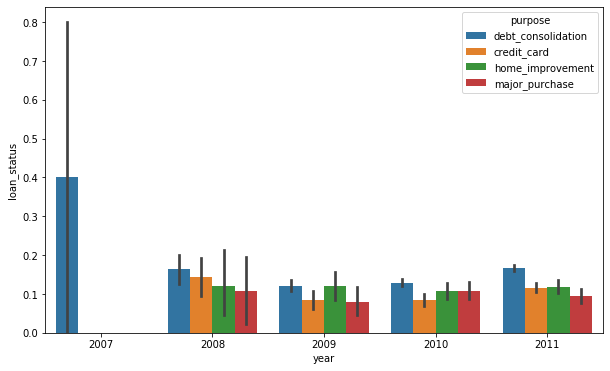

In [900]:
plot_segmented('year')

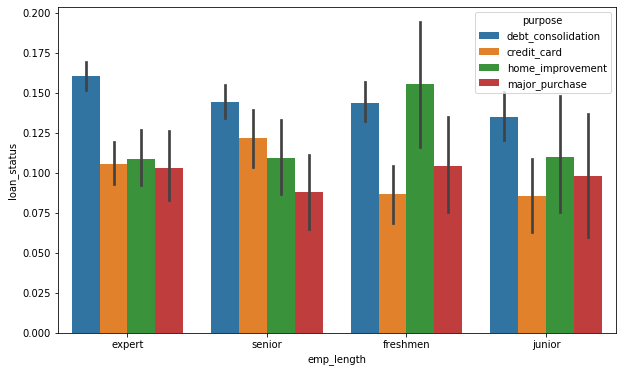

In [878]:
# emp_length
plot_segmented('emp_length')

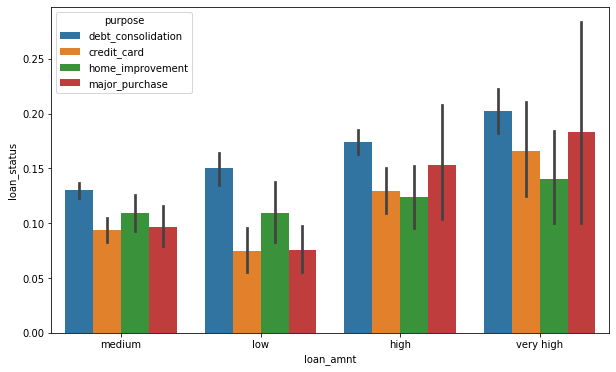

In [879]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

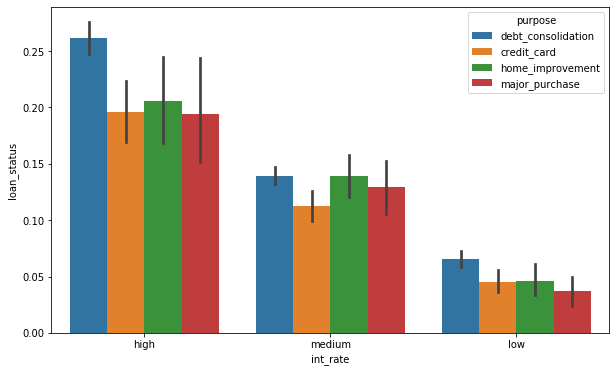

In [880]:
# interest rate
plot_segmented('int_rate')

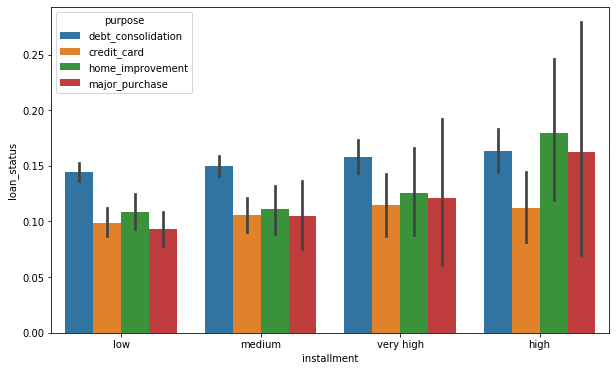

In [881]:
# installment
plot_segmented('installment')

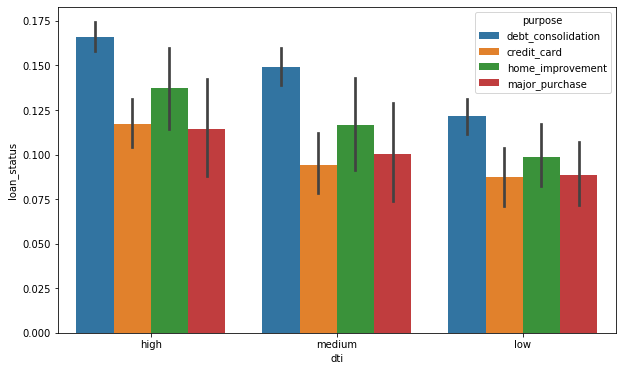

In [882]:
# debt to income ratio
plot_segmented('dti')

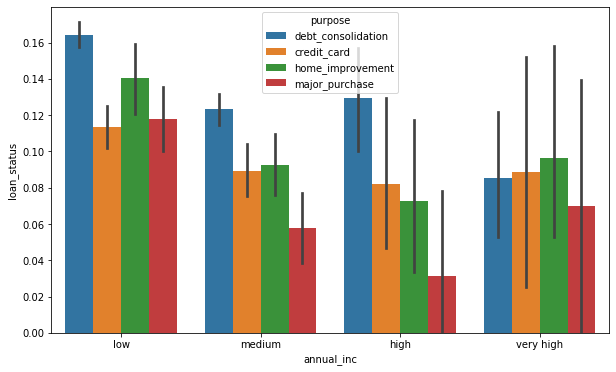

In [883]:
# annual income
plot_segmented('annual_inc')

In [884]:
def diff_rate(cat_var):
    default_rates = main.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))


In [885]:
df_categorical = main.loc[:, main.dtypes == object]
df_categorical['loan_status'] = main['loan_status']

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [886]:
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 6.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 45.0, 'emp_length': 2.0, 'home_ownership': 3.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'purpose': 5.0, 'dti': 4.0}


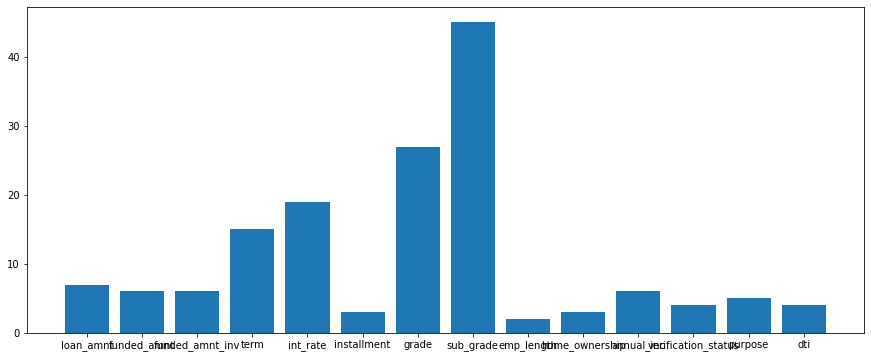

In [887]:
p=d.keys()
p1=d.values()
plt.figure(figsize=(15, 6))
plt.bar(p,p1)
plt.show()


### Sub graph has  the most  difference rate among its categories

In [888]:
main

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,total_pymnt,pub_rec_bankruptcies,PnL,month,year
6,medium,medium,medium,60 months,high,low,C,C5,expert,RENT,low,Not Verified,0,debt_consolidation,high,10110.840000,0.0,44.440571,12,2011
10,medium,medium,medium,60 months,medium,low,C,C3,senior,OWN,medium,Not Verified,0,debt_consolidation,high,7678.017673,0.0,18.123349,12,2011
11,medium,medium,medium,36 months,medium,medium,B,B5,expert,OWN,medium,Source Verified,0,debt_consolidation,medium,13947.989160,0.0,16.233243,12,2011
12,medium,medium,medium,36 months,medium,medium,C,C1,freshmen,RENT,low,Source Verified,1,debt_consolidation,medium,2270.700000,0.0,-74.770000,12,2011
13,low,low,low,36 months,low,low,B,B1,expert,RENT,low,Source Verified,0,credit_card,medium,3480.269999,0.0,16.009000,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,medium,medium,low,36 months,medium,medium,C,C3,junior,RENT,medium,Not Verified,0,debt_consolidation,low,14370.922250,1.0,16.128665,12,2007
39562,low,low,low,36 months,medium,low,C,C1,freshmen,RENT,low,Not Verified,0,debt_consolidation,low,5134.085288,1.0,6.960110,11,2007
39623,medium,medium,low,36 months,medium,medium,D,D3,expert,MORTGAGE,low,Not Verified,1,debt_consolidation,low,4015.960000,1.0,-55.378222,10,2007
39666,high,high,low,36 months,medium,high,C,C4,junior,MORTGAGE,low,Not Verified,1,debt_consolidation,medium,11652.750000,1.0,-24.577670,8,2007


# <span style="color:Orange"> BIVARIATE ANALYSIS</span>

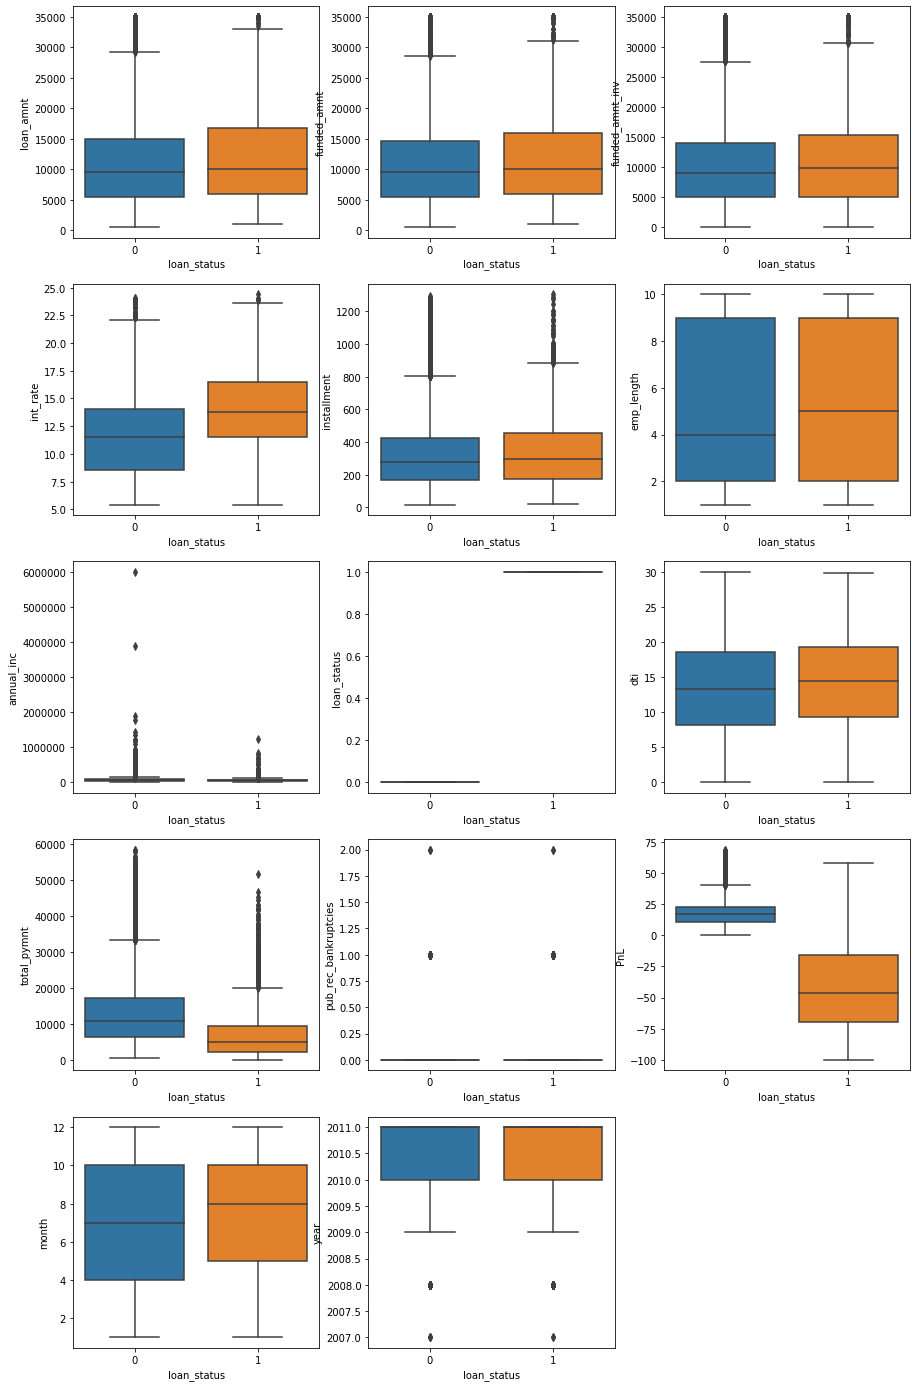

In [889]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    if i !="loan_status":
        plt.subplot(8,3, i + 1)
        sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=numeric_data)
    

plt.show()

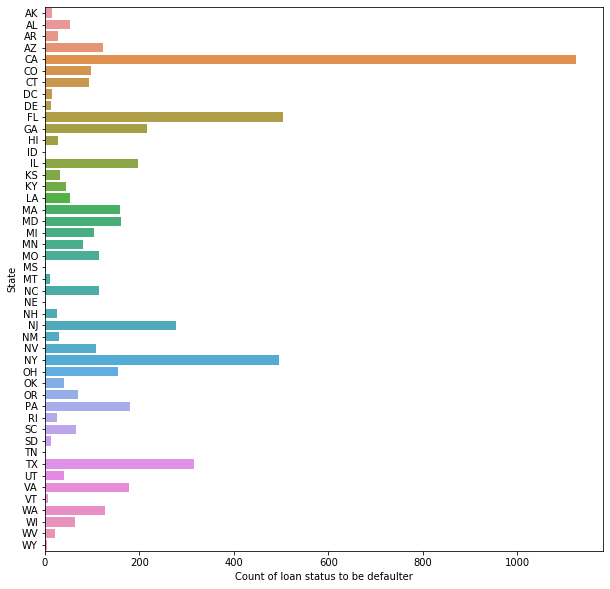

In [891]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

**from this graph we can infer that the most number of defaulter belong to  CA**


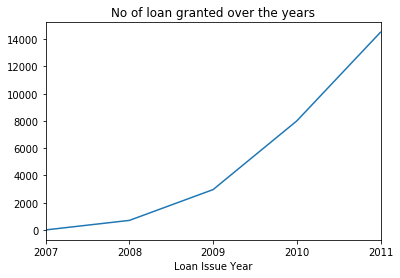

In [890]:
g = main.groupby('year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

**Inference:** Loan Applicants have been increasing exponentially from year 2007 to 2011


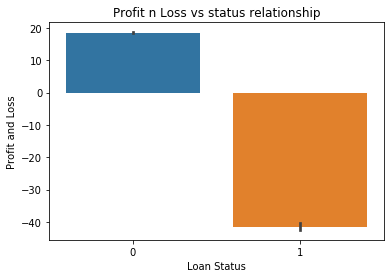

In [893]:
# Relationship of default with funded amount with a barplot

sns.barplot(x='loan_status',y='PnL',data=main)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

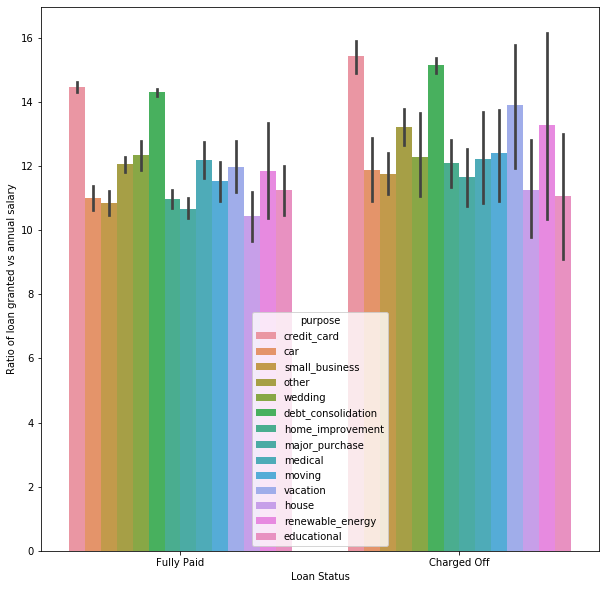

In [899]:
plt.figure(figsize=(10,10))
df=df[df.loan_status!='Current']

sns.barplot(x='loan_status',y='dti',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

### majority of purposes dti of charge off is higher than fully paid 